## Adult Dataset Part 1: Cleaning and Preparation

#### Objectives:
1. Preprocess the data and store the cleaned dataset as adult_clean.csv
2. Load clean dataset and test supervised/unsupervised models
    - Goal: Determine best model to predict if new entry earns >50k or <50k with supervised learning
    - Goal: Find insights and patterns in data using unspuervised learning
3. Apply k-folds cross validation
    - Goal: Evaluate robustness of results across different models.
    - Goal: Use and justify different error metrics


#### Summary of dataset

Datasource: https://archive.ics.uci.edu/ml/datasets/adult

Feature descrptions copied below from the UCI website:

- age: continuous. 
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 
- fnlwgt: Continuous. A weighting assigned from the sampling process.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. 
- education-num: continuous. 
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black. 
- sex: Female, Male. 
- capital-gain: continuous.
- capital-loss: continuous. 
- hours-per-week: continuous. 
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
- target: >50K, <=50K.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#original data does not come with headers. add headers based on the documentation descrption
headers = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 
           'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 
           'hours-per-week', 'native-country', 'target']

In [ ]:
data = pd.read_csv('./data/adult.data', names = headers,skipinitialspace=True)
df = data.copy()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  target          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


On first look, it appears there are no missing values. **However the dataset descrption indicates that missing values have been flled with '?'.** Figure out what to do here :)

In [ ]:
#code)
df.isin(['?']).sum(axis=0)

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
target               0
dtype: int64

In [ ]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Text(0.5, 1.0, 'native-country')

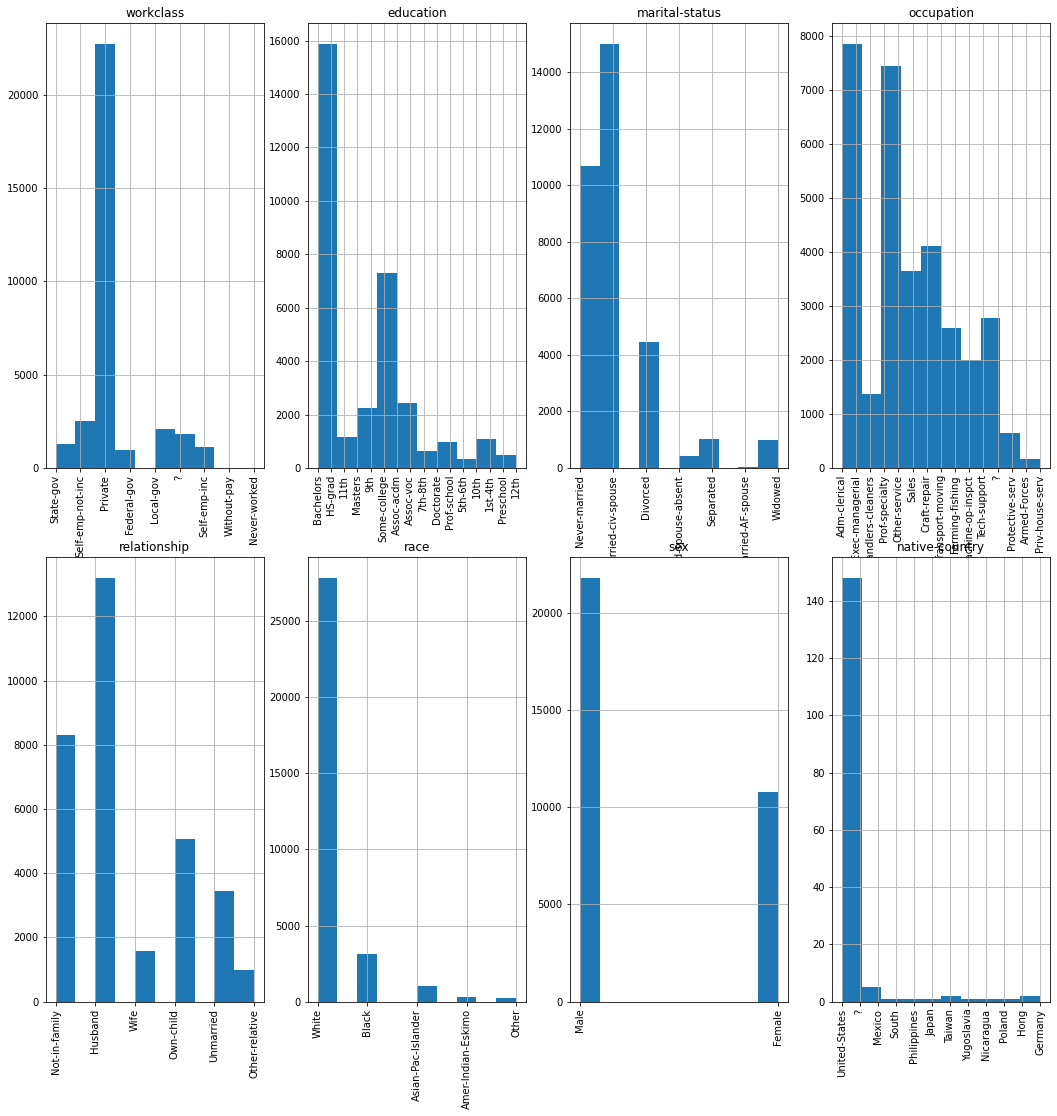

In [ ]:
#subplots
fig,axes = plt.subplots(2,4,figsize = (18,18))
df['workclass'].hist(ax = axes[0,0],xrot=90)
df['education'].hist(ax = axes[0,1],xrot=90)
df['marital-status'].hist(ax = axes[0,2],xrot=90)
df['occupation'].hist(ax = axes[0,3],xrot=90)
df['relationship'].hist(ax = axes[1,0],xrot=90)
df['race'].hist(ax = axes[1,1],xrot=90)
df['sex'].hist(ax = axes[1,2],xrot=90)
df['native-country'][::200].hist(ax = axes[1,3],xrot=90)
axes[0,0].set_title('workclass')
axes[0,1].set_title('education')
axes[0,2].set_title('marital-status')
axes[0,3].set_title('occupation')
axes[1,0].set_title('relationship')
axes[1,1].set_title('race')
axes[1,2].set_title('sex')
axes[1,3].set_title('native-country')

Text(0.5, 1.0, 'target')

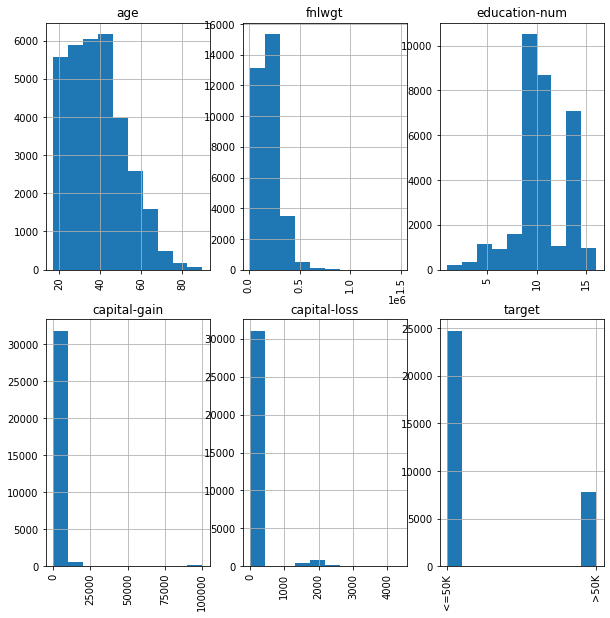

In [ ]:
fig,axes = plt.subplots(2,3,figsize=(10,10))
df['age'].hist(ax = axes[0,0],xrot = 90)
df['fnlwgt'].hist(ax = axes[0,1],xrot = 90)
df['education-num'].hist(ax = axes[0,2],xrot = 90)
df['capital-gain'].hist(ax = axes[1,0],xrot = 90)
df['capital-loss'].hist(ax = axes[1,1],xrot = 90)
df['target'].hist(ax = axes[1,2],xrot = 90)
axes[0,0].set_title('age')
axes[0,1].set_title('fnlwgt')
axes[0,2].set_title('education-num')
axes[1,0].set_title('capital-gain')
axes[1,1].set_title('capital-loss')
axes[1,2].set_title('target')

Before deciding **how to deal with the missing values want to know how they influence the data**. For example, if workclass and occupation for example both have missing values (in the same tuple) it would be reasonable to drop the data.

In [ ]:
#code
df['workclass'] = df['workclass'].replace('?',np.nan)
df['occupation'] = df['occupation'].replace('?',np.nan)
df['native-country'] = df['native-country'].replace('?',np.nan)

In [ ]:
df.isin([np.nan]).sum(axis=0)

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
target               0
dtype: int64

**What % of the dataset do nans represent?** What is the **best approach** for dealing with the nan's?

In [ ]:
percent_NAN = df.isnull().sum()/len(df)
percent_NAN

age               0.000000
workclass         0.056386
fnlwgt            0.000000
education         0.000000
education-num     0.000000
marital-status    0.000000
occupation        0.056601
relationship      0.000000
race              0.000000
sex               0.000000
capital-gain      0.000000
capital-loss      0.000000
hours-per-week    0.000000
native-country    0.017905
target            0.000000
dtype: float64

In [ ]:
#The percentage of nans represent in the dataset
percent_nans = percent_NAN.sum() * 100
print('The percentage of nans represent in the dataset: ',round(percent_nans,2))

#if workclass and occupation for example both have missing values (in the same tuple)
#it would be reasonable to drop the data.
#df[['native-country','occupation']].isnull().all()



The percentage of nans represent in the dataset:  13.09


Text(0.5, 1.0, 'native-country')

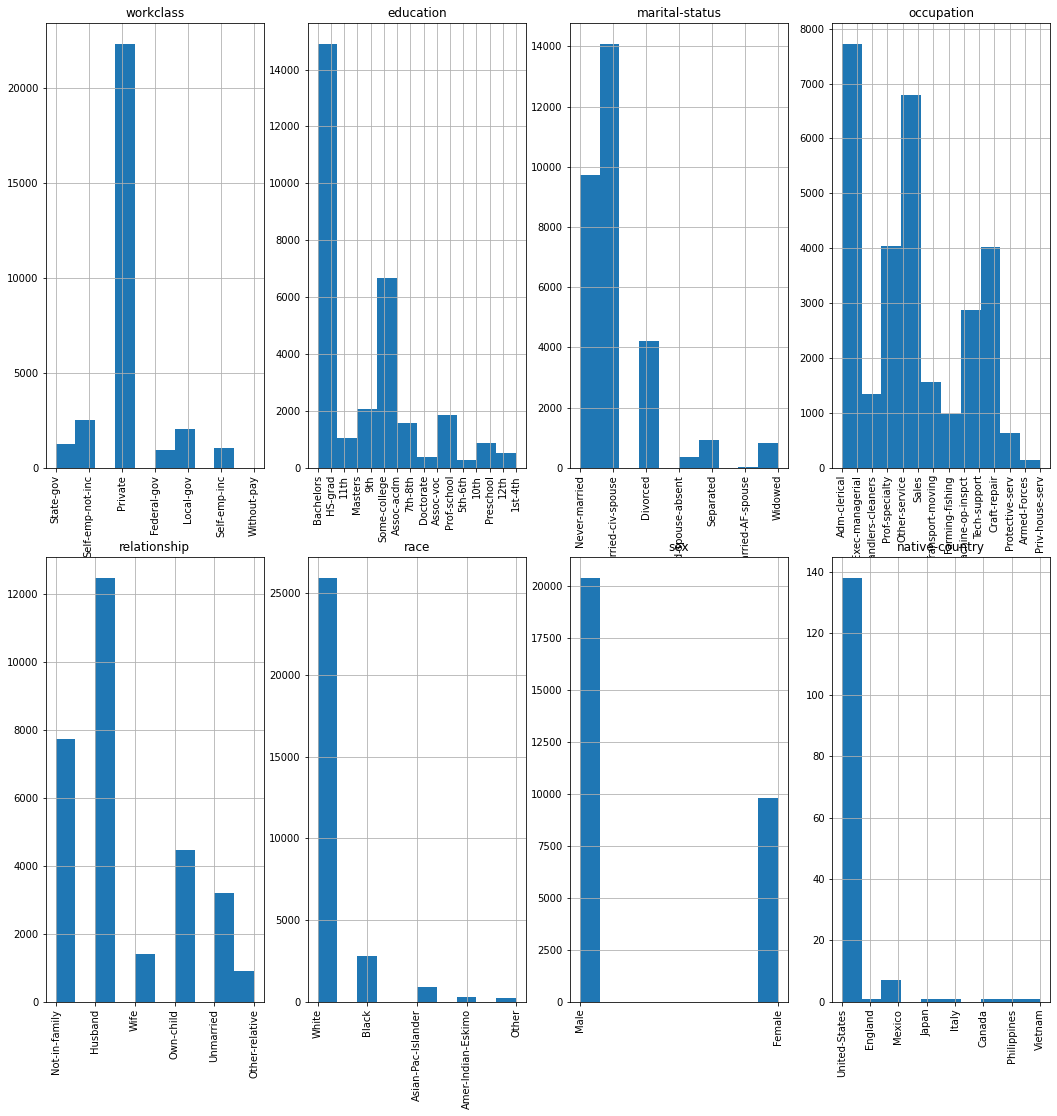

In [ ]:
#plot the categroical columns to see what we are dealing with
df.dropna(inplace=True)
fig,axes = plt.subplots(2,4,figsize = (18,18))
df['workclass'].hist(ax = axes[0,0],xrot=90)
df['education'].hist(ax = axes[0,1],xrot=90)
df['marital-status'].hist(ax = axes[0,2],xrot=90)
df['occupation'].hist(ax = axes[0,3],xrot=90)
df['relationship'].hist(ax = axes[1,0],xrot=90)
df['race'].hist(ax = axes[1,1],xrot=90)
df['sex'].hist(ax = axes[1,2],xrot=90)
df['native-country'][::200].hist(ax = axes[1,3],xrot=90)
axes[0,0].set_title('workclass')
axes[0,1].set_title('education')
axes[0,2].set_title('marital-status')
axes[0,3].set_title('occupation')
axes[1,0].set_title('relationship')
axes[1,1].set_title('race')
axes[1,2].set_title('sex')
axes[1,3].set_title('native-country')

Text(0.5, 1.0, 'target')

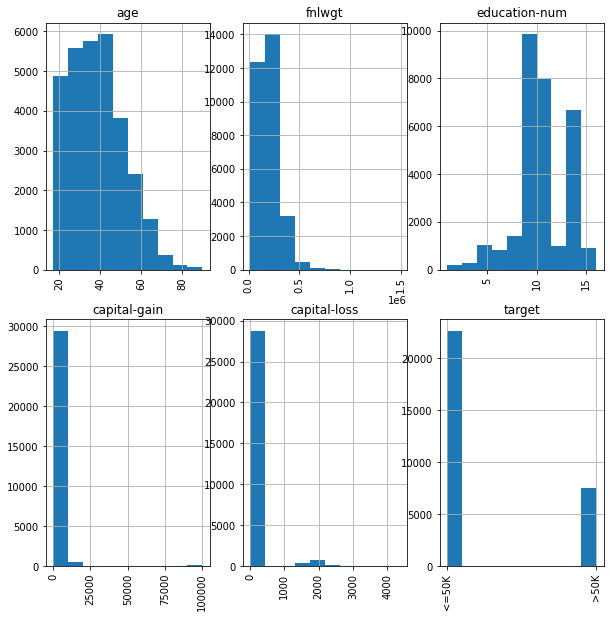

In [ ]:
#plot the numerical columns
fig,axes = plt.subplots(2,3,figsize=(10,10))
df['age'].hist(ax = axes[0,0],xrot = 90)
df['fnlwgt'].hist(ax = axes[0,1],xrot = 90)
df['education-num'].hist(ax = axes[0,2],xrot = 90)
df['capital-gain'].hist(ax = axes[1,0],xrot = 90)
df['capital-loss'].hist(ax = axes[1,1],xrot = 90)
df['target'].hist(ax = axes[1,2],xrot = 90)
axes[0,0].set_title('age')
axes[0,1].set_title('fnlwgt')
axes[0,2].set_title('education-num')
axes[1,0].set_title('capital-gain')
axes[1,1].set_title('capital-loss')
axes[1,2].set_title('target')

#### Additional Steps:
1. Apply statistical tests to determine if dropping values changes the structure of the distribution in the workplace, occupation, and native-country categories i.e. t-test for differnce of modes. 
2. Compare filling the workplace and occupation columns with mode values and applying same statistical tests.

In [ ]:
#train / test... you know the drill
df.nunique()

age                  72
workclass             7
fnlwgt            20263
education            16
education-num        16
marital-status        7
occupation           14
relationship          6
race                  5
sex                   2
capital-gain        118
capital-loss         90
hours-per-week       94
native-country       41
target                2
dtype: int64

In [ ]:
df.drop(['age','fnlwgt','capital-gain','capital-loss','hours-per-week','education-num'],axis = 1,inplace=True)

In [1]:
# df1 = pd.DataFrame()
# df1['workclass'] = df['workclass'].map({'Private':0, 'Self-emp-not-inc':1, 'Self-emp-inc':2, 'Federal-gov':3, 'Local-gov':4, 'State-gov': 5, 'Without-pay':6, 'Never-worked':7})
# df1['target'] = df['target'].map({'>50K':0, '<=50K':1})






In [ ]:
# from sklearn.model_selection import train_test_split
# from sklearn.svm import SVC
# X = df.drop('target',axis=1)
# y = df.target
# X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
# X_train = pd.get_dummies(X_train)
# model = SVC(kernel='linear',random_state=42)
# model.fit(X_train,y_train)

# Discussion of results

In [ ]:
#df[[]].isnull.all(1).any()
#df.isnull.sum/df.shape[0]*100